In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('./margin.csv')
df

,price,percentage
0,790,NaN
1,2190,NaN
2,1990,NaN
3,1795,NaN
4,1339,NaN
...,...,...
8609,2250,NaN
8610,700,NaN
8611,770,NaN
8612,1899,NaN


In [3]:
X = np.array([2290, 870, 3480, 1890])
y = np.array([14.41, 28.85, 10.91, 17.46])

In [9]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

LinearRegression()

In [10]:
lr.intercept_

32.36705290880334

In [11]:
lr.coef_

array([-0.00678056])

In [14]:
np.array(df['price'])

array([ 790, 2190, 1990, ...,  770, 1899, 1190], dtype=int64)

In [16]:
data = np.array(df['price'])
predict = lr.predict(data.reshape(-1, 1))

In [18]:
predict

array([27.01040728, 17.51761757, 18.87373038, ..., 27.14601856,
       19.49076171, 24.29818165])

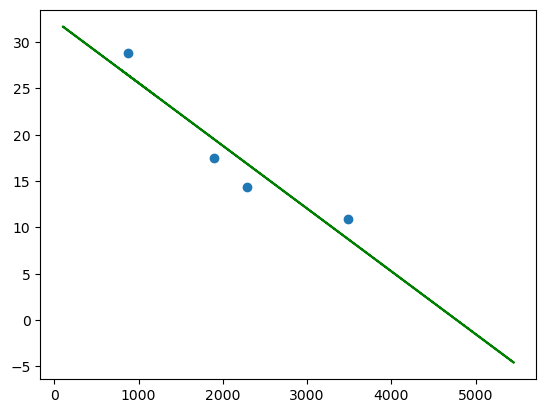

In [19]:
plt.scatter(X, y)
plt.plot(data, predict, color='g')
plt.show()

In [20]:
len(predict)

8614

In [21]:
df['percentage'] = predict
df

,price,percentage
0,790,27.010407
1,2190,17.517618
2,1990,18.873730
3,1795,20.195940
4,1339,23.287878
...,...,...
8609,2250,17.110784
8610,700,27.620658
8611,770,27.146019
8612,1899,19.490762


In [22]:
df[df['percentage'] < 5]

,price,percentage
15,4299,3.217408
55,4950,-1.196739
122,4790,-0.111849
209,4699,0.505182
225,4150,4.227712
236,4380,2.668182
257,4230,3.685267
259,4080,4.702351
307,4890,-0.789905
321,4770,0.023762


# 2차

In [24]:
X

array([2290,  870, 3480, 1890])

In [96]:
X.reshape(-1, 1)

array([[2290],
       [ 870],
       [3480],
       [1890]])

In [154]:
X

array([2290,  870, 3480, 1890])

In [158]:
[X.reshape(-1,1)]

[array([[2290],
        [ 870],
        [3480],
        [1890]])]

In [4]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1,1))

# print(X[0])
X_poly[0]

array([2.2900e+03, 5.2441e+06])

In [5]:
X_poly

array([[2.29000e+03, 5.24410e+06],
       [8.70000e+02, 7.56900e+05],
       [3.48000e+03, 1.21104e+07],
       [1.89000e+03, 3.57210e+06]])

In [6]:
y

array([14.41, 28.85, 10.91, 17.46])

In [11]:
lr = LinearRegression()
lr.fit(X_poly, y)
print(lr.intercept_)
print(lr.coef_.shape)

43.13243409723197
(2,)


In [33]:
df = pd.read_csv('./margin.csv')
df

,price,percentage
0,790,NaN
1,2190,NaN
2,1990,NaN
3,1795,NaN
4,1339,NaN
...,...,...
8609,2250,NaN
8610,700,NaN
8611,770,NaN
8612,1899,NaN


In [12]:
df['price'].nunique()

717

In [13]:
data = np.array(df['price'])
data_poly = poly.transform(data.reshape(-1,1))

In [14]:
X_poly

array([[2.29000e+03, 5.24410e+06],
       [8.70000e+02, 7.56900e+05],
       [3.48000e+03, 1.21104e+07],
       [1.89000e+03, 3.57210e+06]])

In [15]:
data.reshape(-1,1)

array([[ 790],
       [2190],
       [1990],
       ...,
       [ 770],
       [1899],
       [1190]], dtype=int64)

In [16]:
predict = lr.predict(data_poly)

In [175]:
X_poly.shape

(4, 2)

In [185]:
data

array([ 790, 2190, 1990, ...,  770, 1899, 1190], dtype=int64)

In [17]:
predict

array([29.99923137, 15.11718929, 16.58628821, ..., 30.28956598,
       17.3272097 , 24.6523742 ])

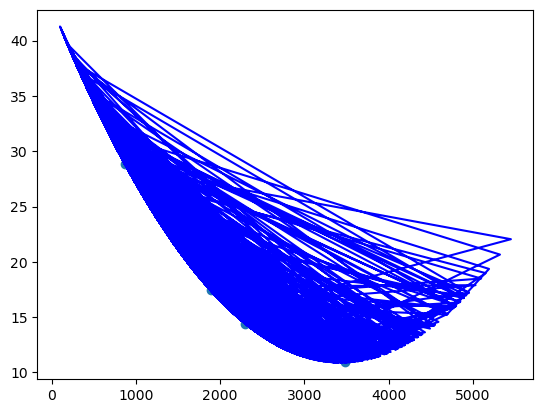

In [18]:
plt.scatter(X, y)
plt.plot(data, predict, color='b')
plt.show()

In [19]:
data

array([ 790, 2190, 1990, ...,  770, 1899, 1190], dtype=int64)

In [20]:
df['percentage'] = predict
df

,price,percentage
0,790,29.999231
1,2190,15.117189
2,1990,16.586288
3,1795,18.229486
4,1339,22.884568
...,...,...
8609,2250,14.719159
8610,700,31.322981
8611,770,30.289566
8612,1899,17.327210


In [195]:
df.to_csv('./margin_2ndPoly.csv', index=False)

In [22]:
import joblib
joblib.dump(lr, './model/margin_2ndPoly.pkl')

['./model/margin_2ndPoly.pkl']

In [23]:
load_model = joblib.load('./model/margin_2ndPoly.pkl')
load_model

LinearRegression()

In [201]:
data.reshape(-1, 1).shape

(8614, 1)

In [21]:
poly

PolynomialFeatures(include_bias=False)

In [25]:
joblib.dump(poly, './model/2ndPoly.pkl')

['./model/2ndPoly.pkl']

In [26]:
load_poly = joblib.load('./model/2ndPoly.pkl')

In [31]:
sample_poly = load_poly.transform(np.array(4315).reshape(-1, 1))
sample_poly

array([[4.3150000e+03, 1.8619225e+07]])

In [34]:
predict_load = load_model.predict(sample_poly)
np.round(predict_load, 2)[0]

13.03

In [29]:
margin = np.round(predict_load, 3)[0]
margin

13.031

In [30]:
int(4315 - (margin / 100 * (4315)))

3752